In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas_datareader as web 
import datetime
import seaborn as sns
import matplotlib
%matplotlib inline
sns.set(color_codes=True) 
# Load the libraries
import missingno as msno
import re
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')


from scipy.stats.mstats import winsorize
import scipy.stats as stats


from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

#relax the display limits on columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_data = pd.read_csv('df_data.csv')
# looking at the dataset
df_data.head()

,Unnamed: 0,date,user,text
0,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he cant update his facebook by t...
1,1,Mon Apr 06 22:19:53 PDT 2009,mattycus,kenichandived many times for the ball managed ...
2,2,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,3,Mon Apr 06 22:19:57 PDT 2009,Karoli,nationwideclass no its not behaving at all im ...
4,4,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,kwesidei not the whole crew


In [3]:
df_data=df_data.drop(columns=['Unnamed: 0','user'])
df_data.head()

,date,text
0,Mon Apr 06 22:19:49 PDT 2009,is upset that he cant update his facebook by t...
1,Mon Apr 06 22:19:53 PDT 2009,kenichandived many times for the ball managed ...
2,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
3,Mon Apr 06 22:19:57 PDT 2009,nationwideclass no its not behaving at all im ...
4,Mon Apr 06 22:20:00 PDT 2009,kwesidei not the whole crew


In [4]:
print(df_data['date'].dtype)

object


In [5]:
# Преобразование столбца с датой в формат datetime
df_data['date'] = pd.to_datetime(df_data['date']).dt.date 

In [6]:
print(df_data['date'].dtype)

object


In [7]:
df_data.head(5)

,date,text
0,2009-04-06,is upset that he cant update his facebook by t...
1,2009-04-06,kenichandived many times for the ball managed ...
2,2009-04-06,my whole body feels itchy and like its on fire
3,2009-04-06,nationwideclass no its not behaving at all im ...
4,2009-04-06,kwesidei not the whole crew


df_data.index = pd.to_datetime(df_data['date'], format='%Y-%m-%d')
del df_data['date']

df_data.head(5)

In [8]:
#df_data['date'] = pd.to_datetime(df_data['date'], format='%Y-%m-%d')
#print(df_data['date'].dtype)

In [9]:
#df_data.index = pd.to_datetime(df_data['date'], format='%Y-%m-%d')
# del df_data['date']

#df_data.head(5)

df_data['date'] = pd.to_datetime(df_data['date'])
tweets_per_day = df_data.groupby(df_data['date'].dt.date)['text'].count()


In [10]:
tweets_per_day = pd.DataFrame(tweets_per_day)
tweets_per_day.head()

,text
date,
2009-04-06,3359
2009-04-07,17311
2009-04-17,3084
2009-04-18,21754
2009-04-19,27469


In [11]:
tweets_per_day.rename(columns={'text': 'tweet count'},inplace=True)

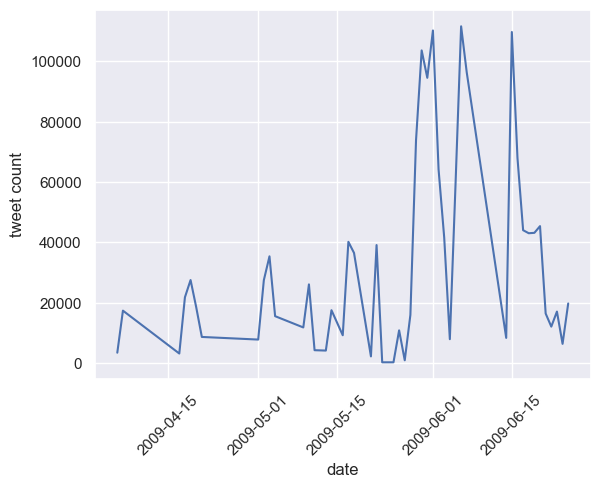

In [12]:
sns.set()
plt.ylabel('tweet count')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.plot(tweets_per_day.index, tweets_per_day['tweet count'], )
plt.show()


train = tweets_per_day[tweets_per_day.index < pd.to_datetime("2009-06-01")]
test = tweets_per_day[tweets_per_day.index >= pd.to_datetime("2009-06-01")]
test


In [13]:
train = tweets_per_day[tweets_per_day.index < pd.to_datetime("2009-06-01").date()]
test = tweets_per_day[tweets_per_day.index >= pd.to_datetime("2009-06-01").date()]
test

,tweet count
date,
2009-06-01,110290
2009-06-02,64192
2009-06-03,41588
2009-06-04,7842
2009-06-05,58757
2009-06-06,111676
2009-06-07,96350
2009-06-14,8272
2009-06-15,109781


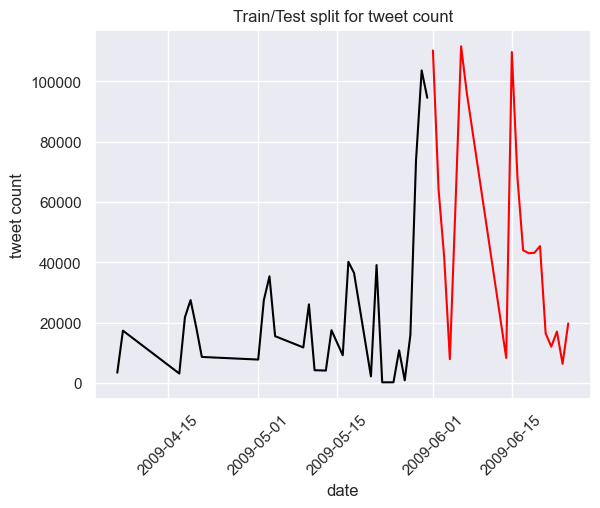

In [14]:
plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('tweet count')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.title("Train/Test split for tweet count")
plt.show()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24908D+01    |proj g|=  2.41880D+00

At iterate    5    f=  1.14042D+01    |proj g|=  5.44500D-02

At iterate   10    f=  1.13863D+01    |proj g|=  2.22752D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     15      1     0     0   3.507D-06   1.139D+01
  F =   11.386267097647478     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


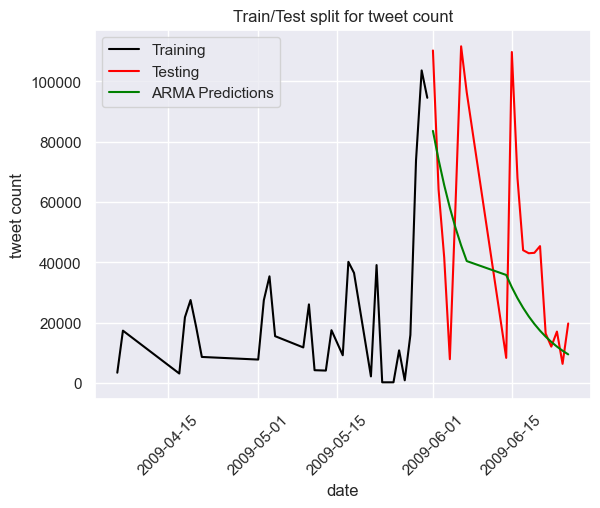

In [15]:
y = train['tweet count']

ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], 
                                             end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_outARMA = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('tweet count')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.title("Train/Test split for tweet count")
plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.legend()
plt.show()

In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["tweet count"].values, y_pred_df["Predictions"]))
print("ARMA RMSE: ",arma_rmse)

ARMA RMSE:  34188.810235395176


In [18]:
#ARIMAmodel = SARIMAX(y, order = (2, 2, 2))
#ARIMAmodel = SARIMAX(y, order = (2, 3, 2))
ARIMAmodel = SARIMAX(y, order = (5, 4, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0],
                                              end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_outARIMA = y_pred_df["Predictions"]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60826D+01    |proj g|=  9.08562D+00

At iterate    5    f=  1.02028D+01    |proj g|=  2.07568D-01

At iterate   10    f=  1.00164D+01    |proj g|=  6.92426D-02

At iterate   15    f=  1.00021D+01    |proj g|=  2.11743D-02

At iterate   20    f=  9.96733D+00    |proj g|=  2.28009D-02

At iterate   25    f=  9.96338D+00    |proj g|=  4.30576D-03

At iterate   30    f=  9.95859D+00    |proj g|=  2.69515D-03

At iterate   35    f=  9.95840D+00    |proj g|=  2.90912D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


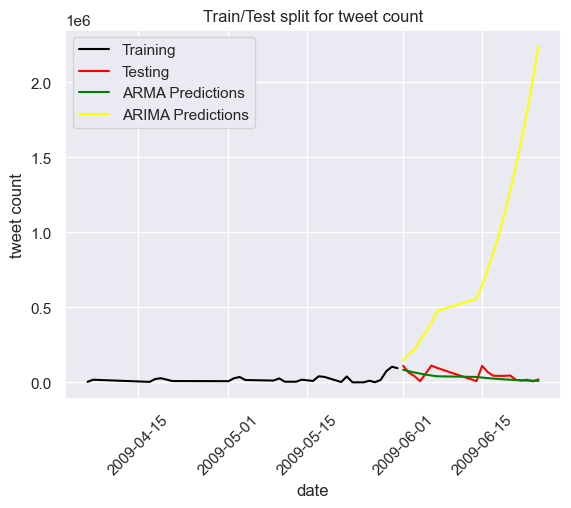

In [19]:
plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('tweet count')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.title("Train/Test split for tweet count")
plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_outARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.legend()
plt.show()

In [20]:
arma_rmse = np.sqrt(mean_squared_error(test["tweet count"].values, y_pred_df["Predictions"]))
print("ARIMA RMSE: ",arma_rmse)

ARIMA RMSE:  1089254.4699113553


In [21]:
SARIMAXmodel = SARIMAX(y, order = (2,2,2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0],
                                                end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_outSARIMAX = y_pred_df["Predictions"] 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.56362D+00    |proj g|=  1.70346D+00

At iterate    5    f=  1.06901D+00    |proj g|=  2.95132D-01

At iterate   10    f=  1.00521D+00    |proj g|=  1.90291D-02

At iterate   15    f=  1.00476D+00    |proj g|=  1.67691D-02

At iterate   20    f=  1.00460D+00    |proj g|=  9.32185D-04

At iterate   25    f=  1.00460D+00    |proj g|=  2.65376D-03

At iterate   30    f=  1.00454D+00    |proj g|=  3.48550D-03

At iterate   35    f=  1.00450D+00    |proj g|=  2.70461D-03

At iterate   40    f=  1.00446D+00    |proj g|=  3.54762D-03

At iterate   45    f=  1.00444D+00    |proj g|=  5.62109D-03

At iterate   50    f=  1.00442D+00    |proj g|=  2.53126D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

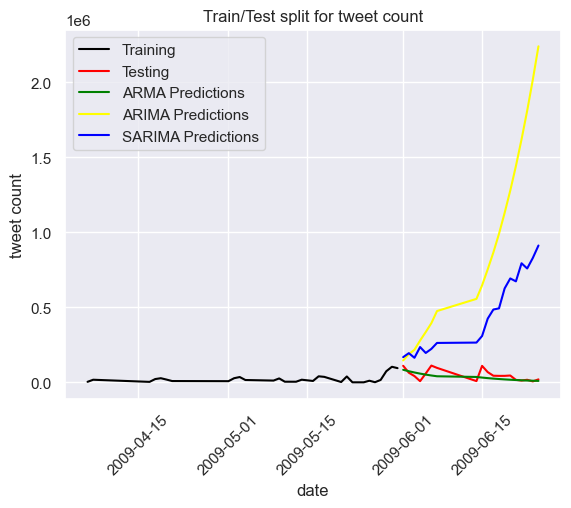

In [22]:
plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('tweet count')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.title("Train/Test split for tweet count")
plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_outARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_outSARIMAX, color='Blue', label = 'SARIMA Predictions')
plt.legend()
plt.show()

In [23]:
arma_rmse = np.sqrt(mean_squared_error(test["tweet count"].values, y_pred_df["Predictions"]))
print("SARIMA RMSE: ",arma_rmse)

SARIMA RMSE:  491865.05346995353
